In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

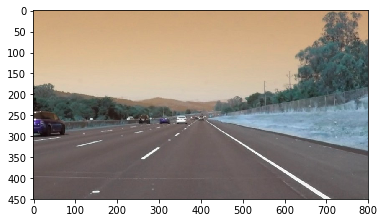

In [2]:
#reading in an image
image = cv2.imread('10.jpeg')
plt.imshow(image) 
plt.show()

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """ 
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = ((y2-y1)/(x2-x1))
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)


In [4]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    print img.shape
    #line_img = np.zeros((img.shape, 3), dtype=np.uint8)
    draw_lines(img, lines)
    return img

In [5]:
import os
os.listdir("new/new/")

['lena.png', 'lena_color.gif', 'lena_gray.gif']

In [6]:


def colorSelect(img):
    color_thresholds = np.array([210,110,70])
    white_colors = np.array([255,255,255])
    return cv2.inRange(img, color_thresholds, white_colors)
    
#for image in images:  
#    pic = mpimg.imread(imageDir+image)
#    color_select_pic = colorSelect(pic)
#    plt.figure()
#    plt.imshow(color_select_pic, cmap='gray')
#    plt.show()

In [7]:
def ROI(img):
    y_shape = img.shape[0]
    x_shape = img.shape[1]
    vertices = np.array([[x_shape/2, y_shape*0.6], [x_shape/2, y_shape*0.6],
            [x_shape, y_shape*1], [0, y_shape*1]], dtype=np.int32)
    return region_of_interest(img, [vertices])

#for image in images:  
#    pic = mpimg.imread(imageDir+image)
#    color_select_pic = colorSelect(pic)
#    image_with_roi = ROI(color_select_pic)
#    plt.figure()
#    plt.imshow(image_with_roi, cmap='Greys_r')
#    plt.show()

In [8]:
def removeChannels(img):
    if len(img.shape) > 2:
        img = grayscale(img)
    return img

def edge_detection(img):
    
    img = removeChannels(img)
    blur = gaussian_blur(img, 5)
    edges = canny(blur, 50, 150)
    return edges

#for image in images:  
#    pic = mpimg.imread(imageDir+image)
#    color_select_pic = colorSelect(pic)
#    image_with_roi = ROI(color_select_pic)
#    edges = edge_detection(image_with_roi)
#    #line_image = hough_lines(edges, rho=1, theta=np.pi/180, threshold=10, min_line_len=40, max_line_gap=100)
#    plt.figure()
#    plt.imshow(edges, cmap='Greys_r')
#    plt.show()

In [9]:
for image in images:  
    pic = mpimg.imread(imageDir+image)
    color_select_pic = colorSelect(pic)
    image_with_roi = ROI(color_select_pic)
    edges = edge_detection(image_with_roi)
    line_image = hough_lines(edges, rho=1, theta=np.pi/180, threshold=10, min_line_len=40, max_line_gap=100)
    plt.figure()
    plt.imshow(line_image, cmap='Greys_r')
    plt.show()

NameError: name 'images' is not defined

In [9]:
cap = cv2.VideoCapture('new/solidWhiteRight.mp4')
while(cap.isOpened()):
    ret, pic = cap.read()
    #pic = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    color_select_pic = colorSelect(pic)
    image_with_roi = ROI(color_select_pic)
    edges = edge_detection(image_with_roi)
    line_image = hough_lines(edges, rho=1, theta=np.pi/180, threshold=10, min_line_len=40, max_line_gap=100)
    cv2.imshow('frame',color_select_pic)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)
(540L, 960L)

error: C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:1944: error: (-209) The lower bounary is neither an array of the same size and same type as src, nor a scalar in function cv::inRange


In [71]:
def weighted_img(img, initial_img, a=0.8, b=1., c=0.):
    return cv2.addWeighted(initial_img, a, img, b, c)
def pipeline_hough(img):
    original_image = np.copy(img)
    color_select_image = colorSelect(original_image)
    image_with_roi = ROI(color_select_image)
    edges = edge_detection(image_with_roi)
    line_image = hough_lines(edges, rho=1, theta=np.pi/180, threshold=10, min_line_len=100, max_line_gap=100)
    #drew_lines(line_image, lines)
    w_image = cv2.addWeighted(line_image, 0.8, original_image, 1.0, 0.0)
    return w_image

img = cv2.imread('new/new/10.jpeg');
lanes = pipeline_hough(img)
plt.figure()
plt.title(image)
plt.imshow(lanes, cmap='Greys_r')
plt.show
split = image.split('.') 
imgName = split[0] + '_lanes.jpg' 
mpimg.imsave(os.path.join('test_images', imgName), lanes)

(450L, 800L)


error: C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op


In [72]:
img1 = cv2.imread('new/lena.png')
img2 = cv2.imread('new/2.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op
